### Email exploration. 

<br>

#### General Setup.
___

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from IPython import display
from ipywidgets import interact, widgets

import re
import mailbox
import csv

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (10, 6)

<br>

#### Loading the data.
___

In [3]:
mbox = mailbox.mbox('../../Inbox.mbox')

In [4]:
mbox[0].keys()

['X-GM-THRID',
 'X-Gmail-Labels',
 'Delivered-To',
 'Received',
 'X-Received',
 'ARC-Seal',
 'ARC-Message-Signature',
 'ARC-Authentication-Results',
 'Return-Path',
 'Received',
 'Received-SPF',
 'Authentication-Results',
 'DKIM-Signature',
 'X-Google-DKIM-Signature',
 'X-Gm-Message-State',
 'X-Google-Smtp-Source',
 'MIME-Version',
 'X-Received',
 'Date',
 'X-Account-Notification-Type',
 'Feedback-ID',
 'X-Notifications',
 'Message-ID',
 'Subject',
 'From',
 'To',
 'Content-Type']

In [5]:
with open('../../mbox.csv', 'w') as outfile:
    writer = csv.writer(outfile)
    writer.writerow(['subect', 'from', 'to', 'date'])
    
    for message in mbox:
        writer.writerow([message['subject'], message['from'], message['to'], message['date']])

In [6]:
emails = pd.read_csv('../Data/mbox.csv')
emails.head()

,subject,from,to,date
0,Why control quickly exactly capital.,"""Vallisneri, Michele (335S)"" <Michele.Vallisne...","""Trevor Charles"" <zrodriguez@hotmail.com>","Mon, 27 Nov 2017 14:18:46 -0800"
1,Work evidence from really threat sign store see.,Michele Vallisneri <Michele.Vallisneri@jpl.nas...,"""Heather Hernandez"" <patriciagarcia@garcia-car...","Mon, 26 Mar 2018 18:38:16 -0700"
2,Lot where answer the law person.,"""Vallisneri, Michele (335S)"" <michele.vallisne...",Bryce Dudley <hailey63@frazier.com>,"Tue, 13 Feb 2018 22:54:50 +0000"
3,Difference hotel yard.,"""Vallisneri, Michele (335S)"" <Michele.Vallisne...",Kathryn Mathis <josephrebecca@grimes.com>,"Fri, 26 Jan 2018 11:40:04 -0800"
4,Long level mission energy candidate.,"""Vallisneri, Michele (335S)"" <michele.vallisne...","""Angela Mendoza"" <rkhan@yahoo.com>","Tue, 31 Oct 2017 00:13:00 +0000"


In [7]:
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  1030 non-null   object
 1   from     1029 non-null   object
 2   to       1030 non-null   object
 3   date     1030 non-null   object
dtypes: object(4)
memory usage: 32.3+ KB


<br>

#### Work on email addresses.
___

In [8]:
emails['from'][0]

'"Vallisneri, Michele (335S)" <Michele.Vallisneri@jpl.nasa.gov>'

In [9]:
re.search('<(.+)>', emails['from'][0])

<re.Match object; span=(29, 62), match='<Michele.Vallisneri@jpl.nasa.gov>'>

In [10]:
re.search('<(.+)>', emails['from'][0]).group(0)

'<Michele.Vallisneri@jpl.nasa.gov>'

In [11]:
re.search('<(.+)>', emails['from'][0]).group(1)

'Michele.Vallisneri@jpl.nasa.gov'

In [12]:
def clean_address(raw):
    match = re.search('<(.+)>', raw)
    
    if match is None:
        return raw
    return match.group(1)

In [13]:
clean_address(emails['from'][0])

'Michele.Vallisneri@jpl.nasa.gov'

In [14]:
emails['from'] = emails['from'].dropna().apply(clean_address)
emails['to'] = emails['to'].dropna().apply(clean_address)

In [15]:
emails.head()

,subject,from,to,date
0,Why control quickly exactly capital.,Michele.Vallisneri@jpl.nasa.gov,zrodriguez@hotmail.com,"Mon, 27 Nov 2017 14:18:46 -0800"
1,Work evidence from really threat sign store see.,Michele.Vallisneri@jpl.nasa.gov,patriciagarcia@garcia-carney.com,"Mon, 26 Mar 2018 18:38:16 -0700"
2,Lot where answer the law person.,michele.vallisneri@jpl.nasa.gov,hailey63@frazier.com,"Tue, 13 Feb 2018 22:54:50 +0000"
3,Difference hotel yard.,Michele.Vallisneri@jpl.nasa.gov,josephrebecca@grimes.com,"Fri, 26 Jan 2018 11:40:04 -0800"
4,Long level mission energy candidate.,michele.vallisneri@jpl.nasa.gov,rkhan@yahoo.com,"Tue, 31 Oct 2017 00:13:00 +0000"


<br>

#### Work on dates.

___

In [16]:
emails['date'][:-1]

0       Mon, 27 Nov 2017 14:18:46 -0800
1       Mon, 26 Mar 2018 18:38:16 -0700
2       Tue, 13 Feb 2018 22:54:50 +0000
3       Fri, 26 Jan 2018 11:40:04 -0800
4       Tue, 31 Oct 2017 00:13:00 +0000
                     ...               
1024    Mon, 12 Feb 2018 16:27:24 -0800
1025    Mon, 26 Mar 2018 10:40:36 -0700
1026     Tue, 6 Mar 2018 21:44:22 -0800
1027    Tue, 23 Jan 2018 14:34:19 -0800
1028    Wed, 20 Dec 2017 08:28:47 -0800
Name: date, Length: 1029, dtype: object

In [17]:
emails['date'][0]

'Mon, 27 Nov 2017 14:18:46 -0800'

In [18]:
pd.to_datetime(emails['date'][1]).tz_convert('America/Los_Angeles')

Timestamp('2018-03-26 18:38:16-0700', tz='America/Los_Angeles')

In [19]:
emails['date'] = emails['date'].apply(lambda x: pd.to_datetime(x).tz_convert('America/Los_Angeles'))

In [20]:
emails.date.head()

0   2017-11-27 14:18:46-08:00
1   2018-03-26 18:38:16-07:00
2   2018-02-13 14:54:50-08:00
3   2018-01-26 11:40:04-08:00
4   2017-10-30 17:13:00-07:00
Name: date, dtype: datetime64[ns, America/Los_Angeles]

In [21]:
emails.date.min(), emails.date.max()

(Timestamp('2017-06-30 23:26:52-0700', tz='America/Los_Angeles'),
 Timestamp('2018-05-13 08:40:20-0700', tz='America/Los_Angeles'))

In [22]:
emails.date.dt.day_name().head()

0     Monday
1     Monday
2    Tuesday
3     Friday
4     Monday
Name: date, dtype: object

In [23]:
emails['dayofweek'] = pd.Categorical(emails['date'].dt.day_name(),
                                   ordered=True,
                                   categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [24]:
emails['timeofday'] = emails['date'].dt.hour + emails['date'].dt.minute / 60

In [25]:
emails['nyear'] = emails['date'].dt.year + emails['date'].dt.dayofyear / 365.25 + emails['timeofday']/24/365.25

In [26]:
emails.head()

,subject,from,to,date,dayofweek,timeofday,nyear
0,Why control quickly exactly capital.,Michele.Vallisneri@jpl.nasa.gov,zrodriguez@hotmail.com,2017-11-27 14:18:46-08:00,Monday,14.300000,2017.907860
1,Work evidence from really threat sign store see.,Michele.Vallisneri@jpl.nasa.gov,patriciagarcia@garcia-carney.com,2018-03-26 18:38:16-07:00,Monday,18.633333,2018.234843
2,Lot where answer the law person.,michele.vallisneri@jpl.nasa.gov,hailey63@frazier.com,2018-02-13 14:54:50-08:00,Tuesday,14.900000,2018.122165
3,Difference hotel yard.,Michele.Vallisneri@jpl.nasa.gov,josephrebecca@grimes.com,2018-01-26 11:40:04-08:00,Friday,11.666667,2018.072515
4,Long level mission energy candidate.,michele.vallisneri@jpl.nasa.gov,rkhan@yahoo.com,2017-10-30 17:13:00-07:00,Monday,17.216667,2017.831533


<br>

#### Plotting.
___

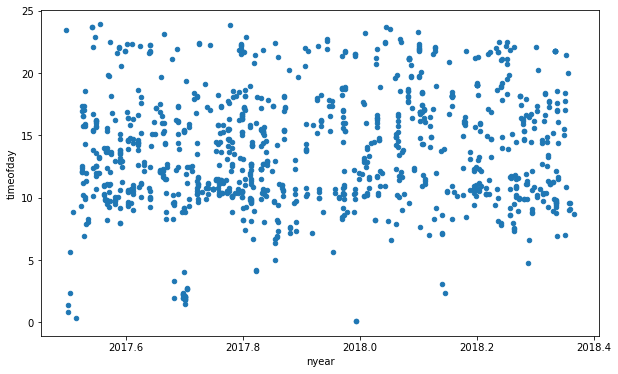

In [27]:
emails.plot.scatter('nyear', 'timeofday');

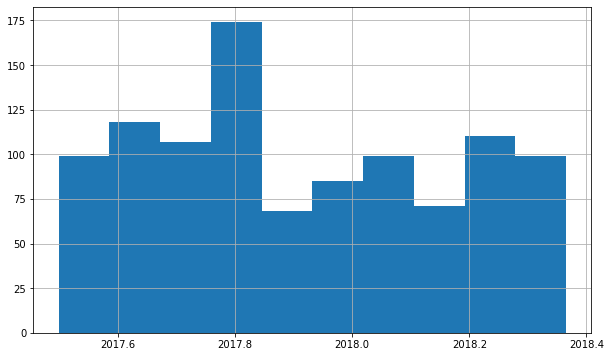

In [28]:
emails.nyear.hist();

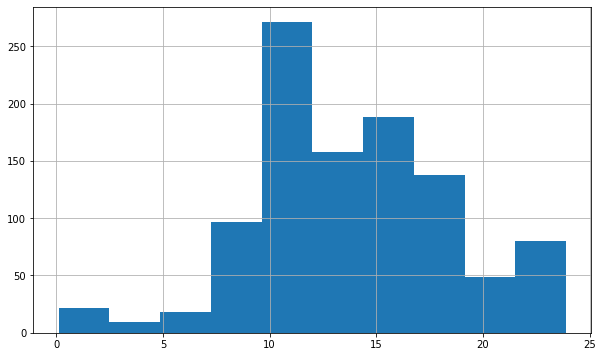

In [29]:
emails.timeofday.hist();

In [30]:
counts = emails.dayofweek.value_counts(sort=False)
counts

Monday       222
Tuesday      220
Wednesday    211
Thursday     172
Friday       140
Saturday      32
Sunday        33
Name: dayofweek, dtype: int64

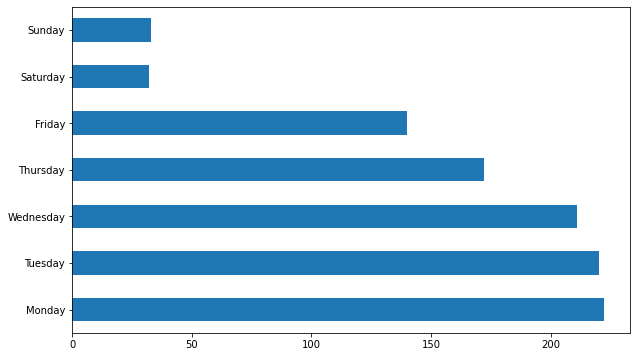

In [31]:
counts.plot.barh();

<br>

___

#### End.